<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br>
    
<center><font size = 4> Integrantes: <br> <br>
    
<center><font size = 3> IF. Edgar Machuca Buenrostro </font>

<center><font size = 3> IF. Douglas Fabian Paris Merin
    
<center><font size = 3> IF. Noé Alejandro Salinas <br> <br>
   
<center> <font color= #555555> <font size = 4> Dec 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/douglasparism/XEMM'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Module 5 </font> <br> <br> <font color= #555555> <font size = 5> Trading Systems </font> <br> <br> <font color= #555555> <font size = 4> Cross Exchange Market Making (XEMM) </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3> The next notebook guides us through the Microstructure and Trading Systems Module 5 project which replicates the **Cross Exchange Market Making (XEMM)** strategy.
    
By actively seeking for price differences in exchange markets we will be able to profit both as Makers (bid) and as Takers (ask).</font>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>
<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3> The cross exchange market making strategy performs market making trades between two markets: it emits limit orders to a less liquid, larger spread market; and emits market orders on a more liquid, smaller spread market whenever the limit orders were hit. This, in effect, sends the liquidity from the more liquid market to the less liquid market.

In cross-exchange market making, a trader acts as a normal market maker on one exchange (the "maker exchange"), creating buy and sell orders. However, the trader eliminates the inventory risk usually associated with market making by using another exchange (the "taker exchange") to simultaneously offset (or "hedge") any trades filled on the maker exchange.


<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>
<hr style="border:0.02in solid gray"> </hr>

<br>

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas==1.3.3 
- numpy==1.21.2
- jupyter==1.0.0
- ccxt==1.59.95
- seaborn==0.11.2

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- Files/orderbooks*.json : JSON files with Historical Orderbooks Gathered from BitFinex and Kraken for BTC/USDT

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

## <font color= #6E6E6E> 2.4 Load Packages</font>

In [2]:
# -- Generic
import pandas as pd
import numpy as np
import json

# -- Visualization
import plotly.graph_objects as go
import plotly.express as px

## <font color= #6E6E6E> 2.5 Load Other Scripts </font>

In [3]:
# -- Project scripts
import visualizations as vs
import functions as fn
from data import fees_schedule, order_book
from timeit import default_timer as timer
import time

# <font color= #6B6B6B> 3. Read and Visualize Data </font>
<hr style="border:0.02in solid gray"> </hr>

Historical Orderbook data is stored in a **JSON** formated file, which stands for **J**ava **S**cript **O**bject **N**otation, in practical terms, it is very similar to a python dictionary since it has a list-like structure of storing the data, with one or several keys and each of which can have more keys and or data points.

Remember also that a Pandas DataFrame is also in its core form a dictionary where each colum is a key and the column contents are each key contents. So, in a way, a **JSON** file is one option to represent a multidimensional DataFrame. 

## <font color= #6B6B6B> 3.1 Load and display the data </font>

To read the contents of the file is very simple, by using the library *json*, it is a pre-installed one and you do need to import it but its already installed in the python base installation.

In [4]:
ob_data = pd.read_json('files/orderbooks_ray.json', orient='values', typ='series')
exchanges = ["kraken", "bitfinex"]
symbol = 'BTC/EUR'
expected_volume = 0

The data is made up by a dictionary containing one key for **bitfinex** and another one for **kraken** which represent our Exchanges.

In [5]:
ob_data

bitfinex    {'2021-11-24T15:15:49.471Z': {'ask_size': {'0'...
kraken      {'2021-11-24T15:15:49.471Z': None, '2021-11-24...
dtype: object

In order to being able to be market makers, we narrowed the data down to avoid "Nones", these are the results:

In [6]:
clean_order_kraken = fn.f_del_none_dict(ob_data['kraken'])

clean_order_bitfinex = fn.f_del_none_dict(ob_data['bitfinex'])

'Number of historical orderbooks:'

'Before dropping Nones: 116'

'After dropping Nones: 39'

'Number of historical orderbooks:'

'Before dropping Nones: 116'

'After dropping Nones: 79'

In [7]:
df_datetime = pd.DataFrame(columns=['dict_key', 'timestamp', 'exchange'])
df_datetime['dict_key'] = clean_order_kraken.keys()
df_datetime['timestamp'] = clean_order_kraken.keys()
df_datetime['exchange'] = 'kraken'

df_datetime_aux = pd.DataFrame(columns=['dict_key', 'timestamp', 'exchange'])
df_datetime_aux['dict_key'] = clean_order_bitfinex.keys()
df_datetime_aux['timestamp'] = clean_order_bitfinex.keys()
df_datetime_aux['exchange'] = 'bitfinex'

df_datetime = df_datetime.append(df_datetime_aux)
df_datetime['timestamp'] = pd.to_datetime(df_datetime['timestamp'])
df_datetime = df_datetime.sort_values(by=['timestamp'])
df_datetime = df_datetime.reset_index(drop=True)
print('OrderBooks by timestamp and exchange')
df_datetime.head(10)

OrderBooks by timestamp and exchange


,dict_key,timestamp,exchange
0,2021-11-24T15:15:49.471Z,2021-11-24 15:15:49.471000+00:00,bitfinex
1,2021-11-24T15:15:50.775Z,2021-11-24 15:15:50.775000+00:00,bitfinex
2,2021-11-24T15:15:52.234Z,2021-11-24 15:15:52.234000+00:00,bitfinex
3,2021-11-24T15:15:52.328Z,2021-11-24 15:15:52.328000+00:00,kraken
4,2021-11-24T15:15:54.154Z,2021-11-24 15:15:54.154000+00:00,bitfinex
5,2021-11-24T15:15:55.277Z,2021-11-24 15:15:55.277000+00:00,kraken
6,2021-11-24T15:15:55.279Z,2021-11-24 15:15:55.279000+00:00,bitfinex
7,2021-11-24T15:15:56.773Z,2021-11-24 15:15:56.773000+00:00,bitfinex
8,2021-11-24T15:15:58.376Z,2021-11-24 15:15:58.376000+00:00,kraken
9,2021-11-24T15:15:58.672Z,2021-11-24 15:15:58.672000+00:00,bitfinex


# <font color= #6B6B6B> 4. Maker and Taker strategies </font>
<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 4.1 Single example </font>

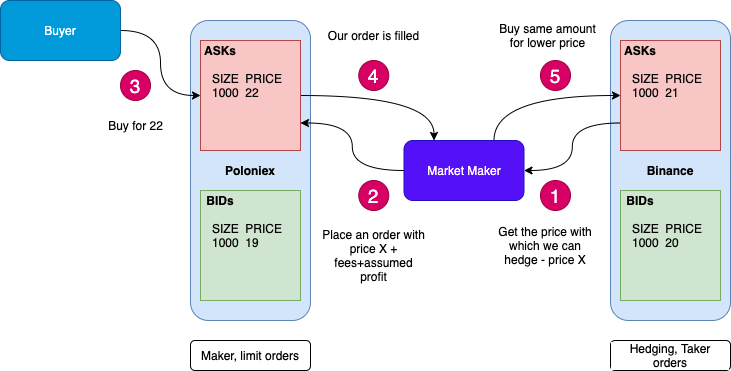

First, we stablish certain parameters for our strategy, such as the origin and destination exhange, fee schedule and inventory.

**Origin**:
- Exchange : Kraken
- Inventory : 100 BTC - 1M EUR

**Destination**:
- Exchange : Bitfinex
- Inventory : 100 BTC - 1M EUR

**Strategy Parameters**: 
- Replicate first 100 bps
- FIFO system at the exchange
- Take into account fees
- Take into account execution latency
- Process Queue
- Read Order Book

We also need to know certain bullet points such as the fees (maker and taker),the profit we'd like to make per trade.

Using the formula below we can know both the taker and the maker bid. Let's remember we only need to add the fees and the expected profit for us to know the "place order" price.

$ taker_{bid} * (1 + taker_{fee}) = maker_{ask} * (1 - maker_{fee})$

$NewPrice = GetPrice + fee + ExpProfit$

### The process for all the market making will be shown via the next example:

In [8]:
ex_O = pd.DataFrame(ob_data[exchanges[0]]['2021-11-24T15:16:31.432Z'])
ex_D = pd.DataFrame(ob_data[exchanges[1]]['2021-11-24T15:16:31.432Z'])

In [9]:
display('Highest Bid Prices')
display('Destination: '+ exchanges[1]+ ' ' + str(max(ex_D.bid)))
display('Origin: ' + exchanges[0]+ ' ' + str(max(ex_O.bid)))

'Highest Bid Prices'

'Destination: bitfinex 56268.0'

'Origin: kraken 56276.0'

In [10]:
display('Lowest Ask Prices')
display('Destination: ' + exchanges[1]+ ' ' + str(min(ex_D.ask)))
display('Origin: ' + exchanges[0]+ ' ' +str(min(ex_O.ask)))

'Lowest Ask Prices'

'Destination: bitfinex 56273.0'

'Origin: kraken 56276.1'

This means we can sell origin $\$56,276$ and buy in destination for $\$56,273$ to profit 3 EUR.

In [11]:
fees = [fees_schedule(exchange=i, symbol=symbol, expected_volume=expected_volume) for i in exchanges]

In [12]:
print('Kraken fees: {}. \nBitfinex fees: {}.'.format(fees[0], fees[1]))

Kraken fees: {'taker': 0.0026, 'maker': 0.0016}. 
Bitfinex fees: {'taker': 0.002, 'maker': 0.001}.


This example is the maker bid when the liquidity transfer goes from origin to destination.

In [13]:
origin_bid = 56276.0
taker_fee = 0.0026
maker_fee = 0.001

In [14]:
maker_bid = origin_bid*(1-taker_fee)/(1+maker_fee)
maker_bid

56073.6087912088

In [15]:
spread = 25
Mid_price_origin = round((min(ex_O.ask)+max(ex_O.bid))/2,6)
PLimit_Repl_max = Mid_price_origin * (1+spread/10000)
PLimit_Repl_min = Mid_price_origin * (1-spread/10000)

In [16]:
ex_D_ask = ex_D.loc[:,'ask_size':'ask'].copy()
ex_D_ask.columns = ['size', 'price']
ex_D_ask['Type'] = 'ask'
ex_D_bid = ex_D[['bid_size','bid']].copy()
ex_D_bid.columns = ['size', 'price']
ex_D_bid['Type'] = 'bid'
ex_D_final = pd.concat([ex_D_ask,ex_D_bid]).sort_values('price')
ex_D_final.reset_index(inplace=True, drop=True)

ex_O_ask = ex_O[ex_O.ask<=PLimit_Repl_max].loc[:,'ask_size':'ask'].copy() #limitamos por los bps a replicar
ex_O_ask.columns = ['size', 'price']
ex_O_ask = ex_O_ask[~ex_O_ask.price.isin([ex_D_ask.price])] #no copiaremos los precios donde ya hay volumen
ex_O_ask['Type'] = 'ask'
ex_O_bid = ex_O[ex_O.bid>=PLimit_Repl_min][['bid_size','bid']].copy()#limitamos por los bps a replicar
ex_O_bid.columns = ['size', 'price']
ex_O_bid = ex_O_bid[~ex_O_bid.price.isin([ex_D_bid.price])] #no copiaremos los precios donde ya hay volumen
ex_O_bid['Type'] = 'bid'
ex_O_final = pd.concat([ex_O_ask,ex_O_bid]).sort_values('price')
ex_O_final.reset_index(inplace=True, drop=True)

The following bid and ask are the closest to the mid price, therefore, these will be used as anchors to reach liquidity.

In [17]:
bid_example = ex_O_final[ex_O_final['Type'] =='bid']
bid_example = bid_example[bid_example['price'] == bid_example['price'].max()]

ask_example = ex_O_final[ex_O_final['Type'] =='ask']
ask_example = ask_example[ask_example['price'] == ask_example['price'].min()]

display(bid_example)
display(ask_example)

,size,price,Type
88,5.42,56276.0,bid


,size,price,Type
89,3.279,56276.1,ask


We stablish fees and inventory:

In [18]:
taker_fee = fees[0]['taker']*0.0001 #bps to decimal
maker_fee = fees[1]['maker']*0.0001 #bps to decimal
token = 100 #BTC
fiat = 1000000 #EUR
inventory = {'asset':100, 'fiat':1000000}
tokens = {'asset':0, 'fiat':0}
profit = 0.01 #1 centavo de profit por trade
decimals = 10

Now, we add the fees to the origin prices and post accordingly.

In [19]:
ex_D_final, inventory, tokens = fn.post_maker_bid(bid_example['price'], bid_example['size'], taker_fee, maker_fee,
                                               inventory, tokens,ex_D_final, decimals, profit, lat = 0.01)

ex_D_final, inventory, tokens = fn.post_maker_ask(ask_example['price'], ask_example['size'], taker_fee, maker_fee,
                                               inventory, tokens,ex_D_final, decimals, profit, lat = 0.01)

ex_D_final.loc[20:30]

Order posted
size      5.42
price    56276
Type       bid
Name: -1, dtype: object
Order posted
size       3.279
price    56276.1
Type         ask
Name: -1, dtype: object


,size,price,Type
20,0.009923,56262.000000,bid
21,0.002481,56263.000000,bid
22,0.001985,56264.000000,bid
23,0.420000,56267.000000,bid
24,0.000070,56268.000000,bid
25,0.035600,56273.000000,ask
26,0.187329,56275.000000,ask
27,5.420000,56275.969741,bid
28,3.279000,56276.130259,ask
29,0.182073,56281.000000,ask


Two new limit orders have emerged (index 27 and 28), therefore our inventory has been reduced.

The inventory and tokens were updated for the case in which the order is executed (XEMM).

In [20]:
print("New inventory and tokens")
inventory, tokens

New inventory and tokens


({'asset': 94.58, 'fiat': 815470.5688794339},
 {'asset': 5.42, 'fiat': 184529.43112056603})

The following example corresponds to a bid operation. As expected liquidity will be transfered from origin to destination with zero risk.

In [21]:
ex_D_final_2 = ex_D_final.copy()
ex_O_final_2 = ex_O_final.copy()
destination_bid = fn.calc_D_bid(56276, taker_fee, maker_fee, decimals, profit) #calculamos los precios posteados
destination_ask = fn.calc_D_ask(56276.1, taker_fee, maker_fee, decimals, profit) #calculamos los precios posteados

In [22]:
inventory, tokens, ex_D_final_2, ex_O_final_2 = fn.execute_bids(56276.0, destination_bid, taker_fee, maker_fee, 
                                                             5.42, inventory, tokens,ex_D_final_2,ex_O_final_2, lat=0)

The transaction was made succesfuly. Now, after executing in both markets, the inventory and the tokens came back to it's original value plus the expected profit of ¢1.

In [23]:
inventory, tokens

({'asset': 100.0, 'fiat': 815470.5688794339},
 {'asset': 0.0, 'fiat': 184529.48532057158})

Now, ask transaction:

In [24]:
inventory, tokens, ex_D_final_2, ex_O_final_2 = fn.execute_asks(56276.1, destination_ask, taker_fee, maker_fee, 
                                                             3.279, inventory, tokens,ex_D_final_2,ex_O_final_2, lat=0)

Since the position is opposite, the profit is now represented in tokens.

In [25]:
inventory, tokens

({'asset': 100.0, 'fiat': 999999.9815470568},
 {'asset': 0.0, 'fiat': 0.10544294529245235})

**Profit test:**

In [26]:
round(inventory['fiat']+tokens['fiat'], 1)

1000000.1

Tambien observamos que el volumen de estos precios se ah reducido debido a la ejucicón de ordenes.

The volume of these prices has been reduced because of the order execution.

In [27]:
display(ex_O_final[ex_O_final['price'] == 56276.0])
display(ex_O_final_2[ex_O_final_2['price'] == 56276.0])

,size,price,Type
88,5.42,56276.0,bid


,size,price,Type
88,0.0,56276.0,bid


In [28]:
display(ex_D_final[ex_D_final['price'] == destination_bid])
display(ex_D_final_2[ex_D_final_2['price'] == destination_bid])

,size,price,Type
27,5.42,56275.969741,bid


,size,price,Type
27,0.0,56275.969741,bid


## <font color= #6B6B6B> 4.2 XEMM backtesting </font>

The preceding method is "massively" repeated by obtaining a whole timestamp and beginning to build liquidity in the target market. These calculations took into consideration the bid, ask, profit, latency, token and FIAT inventories, as well as the criteria specified at the start of the project.

In [29]:
fn.test_XEMM()

'Number of historical orderbooks:'

'Before dropping Nones: 116'

'After dropping Nones: 39'

'Number of historical orderbooks:'

'Before dropping Nones: 116'

'After dropping Nones: 79'

Al momento
2021-11-24T15:15:52.234Z bitfinex
2021-11-24T15:15:52.328Z kraken
TIEMPO MAS CERCANO FUTURO BITFINEX 2021-11-24 15:15:54.154000+00:00


'Highest Bid Prices'

'Destination: bitfinex 56296.0'

'Origin: kraken 56308.4'

'Lowest Ask Prices'

'Destination: bitfinex 56297.0'

'Origin: kraken 56308.5'

,size,price,Type
80,0.05,56308.4,bid


,size,price,Type
81,0.309,56308.5,ask


1.92


,index,size,price,type,source,status,time_delta


bid id 79
Order posted
size        0.05
price    56308.4
Type         bid
Name: -1, dtype: object
Order posted
size       0.309
price    56308.5
Type         ask
Name: -1, dtype: object
{'asset': 99.95, 'fiat': 982600.6641462418} {'asset': 0.05, 'fiat': 17399.33585375816}
Destination BID 56308.369728978
Destination ASK 56308.530271062
Se ejecuta BID


,index,size,price,type,source,status,time_delta


bid id 78
Order posted
size       0.081
price    56304.9
Type         bid
Name: -1, dtype: object
Order posted
size     0.177
price    56309
Type       ask
Name: -1, dtype: object
{'asset': 99.919, 'fiat': 972633.965788232} {'asset': 0.081, 'fiat': 27366.034711768043}
Destination BID 56304.869730238
Destination ASK 56309.030271242
Se ejecuta BID


,index,size,price,type,source,status,time_delta
0,1,0.309,56308.530271,ask,destination,posted,0.463818


bid id 77
Order posted
size        0.02
price    56304.8
Type         bid
Name: -1, dtype: object
Order posted
size       4.442
price    56312.5
Type         ask
Name: -1, dtype: object
{'asset': 99.98, 'fiat': 739893.0404316026} {'asset': 0.02, 'fiat': 260106.96396839712}
Destination BID 56304.769730274
Destination ASK 56312.530272502
Se ejecuta BID


,index,size,price,type,source,status,time_delta
0,5,0.177,56309.030271,ask,destination,posted,1.027379


bid id 76
Order posted
size       0.099
price    56304.7
Type         bid
Name: -1, dtype: object
Order posted
size         0.5
price    56317.3
Type         ask
Name: -1, dtype: object
{'asset': 99.901, 'fiat': 721701.0726558276} {'asset': 0.099, 'fiat': 278298.933714172}
Destination BID 56304.66973031
Destination ASK 56317.33027423
Se ejecuta BID


,index,size,price,type,source,status,time_delta
0,11,4.442,56312.530273,ask,destination,posted,1.561015


bid id 75
Order posted
size       0.064
price    56303.8
Type         bid
Name: -1, dtype: object
Order posted
size         0.2
price    56318.2
Type         ask
Name: -1, dtype: object
{'asset': 99.936, 'fiat': 960577.6610573448} {'asset': 0.064, 'fiat': 39422.39072265038}
Destination BID 56303.769730634
Destination ASK 56318.230274554
Se ejecuta BID


,index,size,price,type,source,status,time_delta
0,17,0.5,56317.330274,ask,destination,posted,1.899463
1,23,0.2,56318.230275,ask,destination,posted,1.916232


,size,price,type,source,status,time_delta
0,0.050,56308.369729,bid,destination,posted,0.0
1,0.309,56308.530271,ask,destination,posted,0.0
2,0.050,56308.369729,bid,destination,executed,0.0
3,0.050,56308.400000,bid,origin,executed,0.0
4,0.081,56304.869730,bid,destination,posted,0.0
5,0.177,56309.030271,ask,destination,posted,0.0
6,0.081,56304.869730,bid,destination,executed,0.0
7,0.081,56304.900000,bid,origin,executed,0.0
8,0.309,56308.530271,ask,destination,executed,0.0
9,0.309,56308.500000,ask,origin,executed,0.0


{'asset': 100.0, 'fiat': 999999.9683071394} {'asset': 0.0, 'fiat': 0.0911128550524154}
TIMEDELTA 1.92


In [32]:
999999.9683071394 + 0.0911128550524154

1000000.0594199944

## <font color= #6B6B6B> 4.3 Acquired knowledge </font> 

In the exercise, we discovered how many variables can influence the XEMM, such as latency, which limits the number of orders we can place in a given time. It is also important to consider token and FIAT inventories, because it is not ruled out that we do not receive all of the volume in the origin exchange. 

Since we are using limit orders on one side of the arbitrage, the overall costs are lower than if we were using market orders, and utilizing limit orders on one side ensures that the exchange matching algorithm will complete our order as fast as possible. This element strengthens this strategy over having two taker orders on each sides. In this scenario, the sequence begins with the exchange filling one side, so it only needs to execute the taker order on the other side.

This reduces the risk of slippage compared to executing two taker orders on each sides as in the arbitrage. This strategy is considered far more advanced than arbitrage. Furthermore, active quotation does not preclude us from pursuing arbitrage possibilities in their entirety. 

## <font color= #6B6B6B> 4.4 Future developments </font> 

One approach is to use multiple exchanges to find better buying and selling opportunity, resulting in a bigger profit from the strategy.

In the preceding case, XEMM was done with the identical instrument on a different exchange. Why don't we hedge on the same instrument, but this time with margin? Why don't we utilize options, futures, or perpetuals to hedge? Where are the fees cheaper and we may use leverage to reduce our capital engagement? Actually, nothing can stop us. This is exactly where the plot is heading.

# <font color= #6B6B6B> <font size = 6> References </font>
<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

[2] (2021). https://hummingbot.io/en/blog/2020-09-what-is-cross-exchange-market-making/


[3] GitHub - IFFranciscoME/XEMM: A light weighted library to define and backtest a Cross Exchange Market Maker (XEMM) system, based on CCXT. Use only for academic purposes. (2021). https://github.com/IFFranciscoME/XEMM

[4] Market making with cross-exchange hedging versus arbitrage | MultiTrader - Smart Cryptocurrency Arbitrage Trading Platform. (2021). https://www.multitrader.io/market-making-with-cross-exchange-hedging/


<br>